# PA006 - Bank Marketing  Strategy

# Solution Planning ( IOT )

## Imput

 I have been as a Data Scientis Consultant to build a data product that create a customers segmentattion which will handle the marketing strategy and the following expected results from consultancy:
        
        
- 1. Create customer segmentation based on clear selection criteria.
- 2. Make customer segmentation accessible to the operations team.
- 3. Teach the operations team how to use the solution.
- 4. Transfer knowledge to international bank Data Scientists.
- 5. Recommend 3 business levers for each customer segment. 


## Output

- Tools:
    - Jupyter Notebook
    - Metabase
    - Streamlit
    
    
- URL to the Operation team make tests;
- Download of selected data;


# Tasks

- Data Descriptive:
    - NA's replace
    - Outliers Detection
    
    
- EDA:
    - Univariate Analysis
    - Bivariate Analysis
    - Outliers Detection
    - Feature Selection
    - Study of Space
    - Embeding Definition
    
- Machine Learning Training:
    - Performance Analysis
    - Clustering Analysis
    - Define clustering number
    
- EDA - Insights:
    - Expain the segmentattion characters
    
- Table to store the clustered clients
- Creat the production script


- AWS Architecture:
    - S3 for store the data
    - EC2 for store the ETL and visualization tool.
    - DB to store the table 
    - Cronjob
    - Papermill

# 0.1 Imports

In [34]:
import inflection
# import numba as nb
# import  umap.umap_  as umap

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from  sklearn  import  datasets        as dt
from  sklearn  import  cluster         as c
from  sklearn  import  metrics         as m
from  sklearn  import  manifold        as mn
from  sklearn  import  decomposition   as dd
from  sklearn  import  preprocessing   as pp
from  sklearn  import  mixture         as mx
from  sklearn  import  ensemble        as en
from  sklearn  import  model_selection as ms

from bayes_opt                   import BayesianOptimization
from bayes_opt                   import UtilityFunction
from matplotlib                  import gridspec
from pandas_profiling            import ProfileReport
from IPython.core.display        import HTML



# 0.2 Helper functions

In [35]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

jupyter_settings()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Experimentation 01

## make circles

In [36]:
x, y = dt.make_circles( n_samples=1000, factor=0.3, noise=0.05, random_state=0 )

x_train, x_test, y_train, y_test = ms.train_test_split( x, y, stratify=y, random_state=0 )


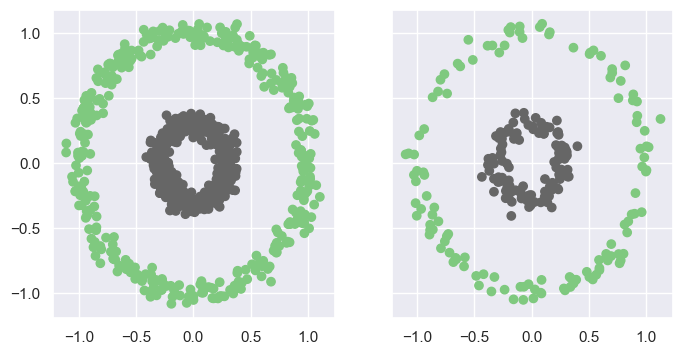

In [49]:
_, (ax1, ax2) = plt.subplots( ncols=2, sharex=True, sharey=True, figsize=(8,4) )
ax1.scatter( x_train[:, 0], x_train[:, 1], c=y_train, cmap='Accent');
ax2.scatter( x_test[:, 0], x_test[:, 1], c=y_test, cmap='Accent');

# Embedding

In [41]:
# Method definition
pca = dd.PCA( n_components=2 )
kernel_pca = dd.KernelPCA( n_components=2, kernel='rbf', gamma=10, fit_inverse_transform=True, alpha=0.1 )

# embedding aplication
x_test_pca = pca.fit( x_train ).transform( x_test )
x_test_kernel_pca = kernel_pca.fit( x_train ).transform( x_test )

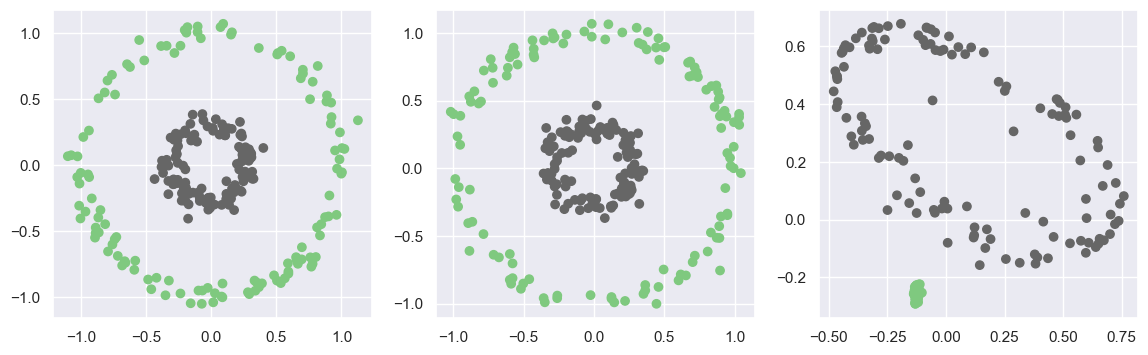

In [51]:
_, (origin_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots( ncols=3, figsize=(14, 4))
origin_data_ax.scatter( x_test[:, 0], x_test[:, 1], c=y_test , cmap='Accent');
pca_proj_ax.scatter( x_test_pca[:, 0], x_test_pca[:, 1], c=y_test , cmap='Accent');
kernel_pca_proj_ax.scatter( x_test_kernel_pca[:, 0], x_test_kernel_pca[:, 1], c=y_test, cmap='Accent' );

# Noise data

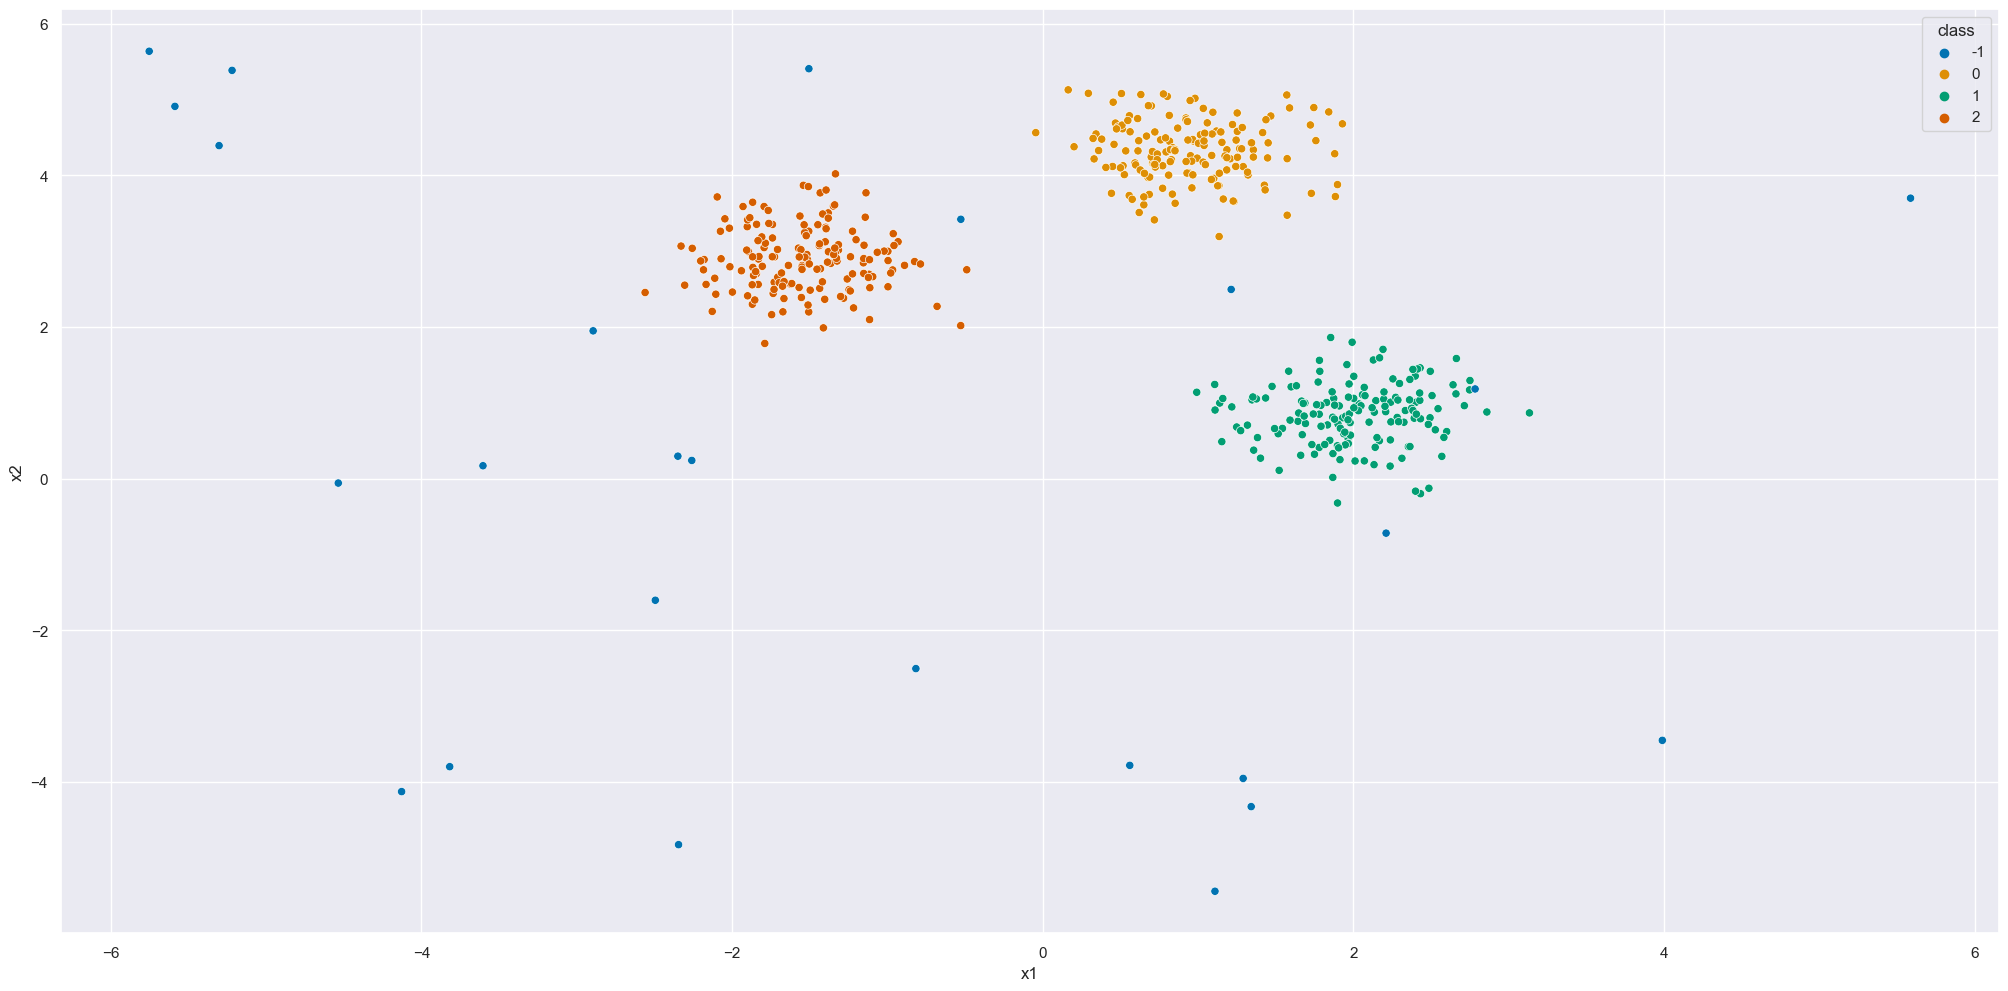

In [56]:
n_samples = 500 
outliers_fractions = 0.05

n_features = 2
n_clusters = 3

n_outliers = int( outliers_fractions * n_samples )
n_inliers = n_samples - n_outliers

blob_params = dict( random_state = 0,
                    n_samples = n_inliers,
                    n_features = n_features )


x, y = dt.make_blobs( centers=n_clusters, cluster_std=0.4, ** blob_params )


df = pd.DataFrame( x, columns=['x' + str( i ) for i in list( range( 1, n_features+1) ) ] )
df['class'] = y


rng = np.random.RandomState( 42 )

df_noise = pd.DataFrame( rng.uniform( low=-6, 
                         high=6,
                         size=( n_outliers, n_features) ),
                         columns=['x' + str( i ) for i in list( range( 1, n_features+1) )])

df_noise['class']= -1

df_raw = pd.concat([ df, df_noise], axis=0 )

sns.scatterplot( x='x1', y='x2', hue='class', palette='colorblind',  data=df_raw );

# Embedding Space

In [58]:

y= df_raw[ 'class' ]
x = df_raw.drop( 'class', axis=1 )


In [65]:
# Method definition
pca = dd.PCA( n_components=2 )
kernel_pca = dd.KernelPCA( n_components=2, 
                           kernel='sigmoid',
                           degree=6 )

# embedding aplication
x_pca = pca.fit_transform( x )
x_kernel_pca = kernel_pca.fit_transform( x )

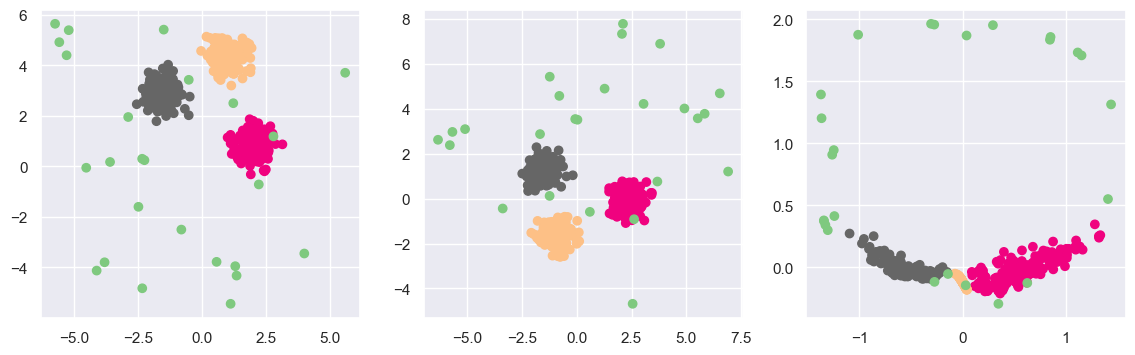

In [66]:
_, (origin_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots( ncols=3, figsize=(14, 4))
origin_data_ax.scatter( x['x1'], x['x2'], c=y, cmap='Accent');
pca_proj_ax.scatter( x_pca[:, 0], x_pca[:, 1], c=y , cmap='Accent');
kernel_pca_proj_ax.scatter( x_kernel_pca[:, 0], x_kernel_pca[:, 1], c=y, cmap='Accent' );

# Outliers detection Experimentation

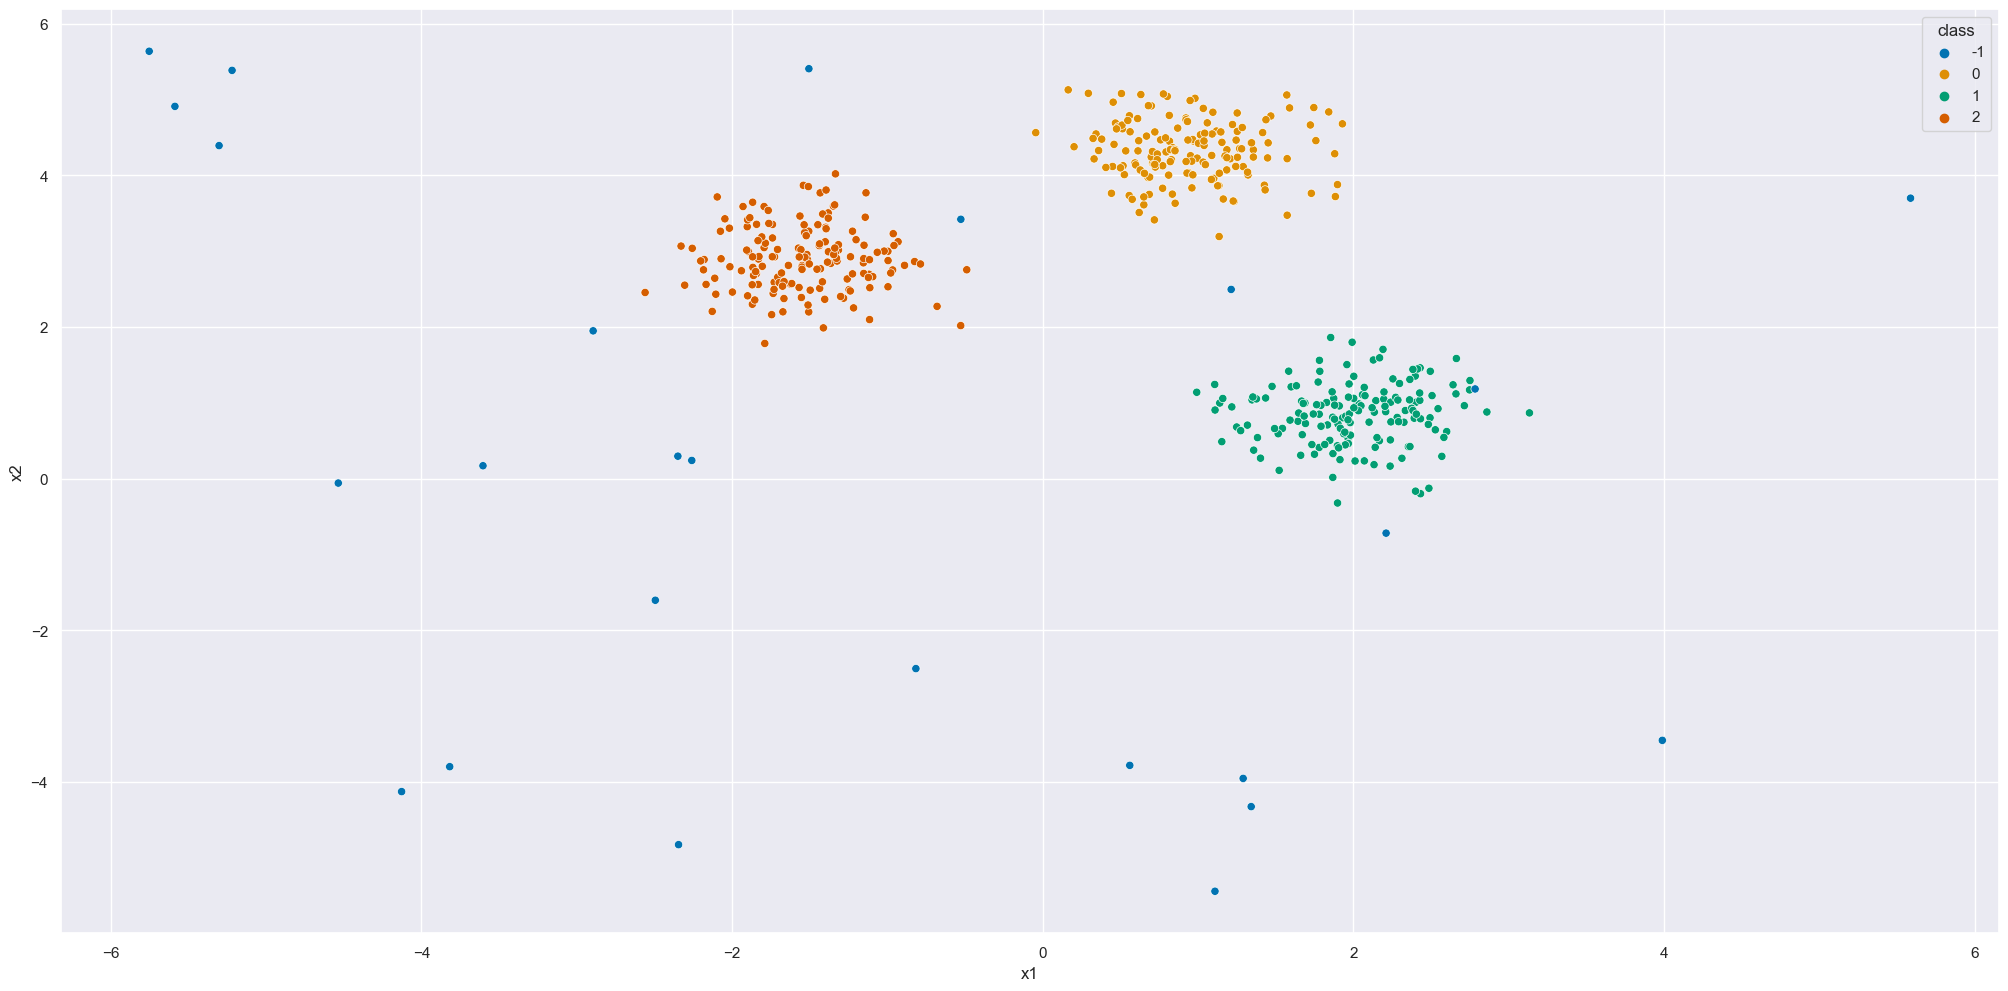

In [3]:
n_samples = 500 
outliers_fractions = 0.05

n_features = 2
n_clusters = 3

n_outliers = int( outliers_fractions * n_samples )
n_inliers = n_samples - n_outliers

blob_params = dict( random_state = 0,
                    n_samples = n_inliers,
                    n_features = n_features )


x, y = dt.make_blobs( centers=n_clusters, cluster_std=0.4, ** blob_params )


df = pd.DataFrame( x, columns=['x' + str( i ) for i in list( range( 1, n_features+1) ) ] )
df['class'] = y


rng = np.random.RandomState( 42 )

df_noise = pd.DataFrame( rng.uniform( low=-6, 
                         high=6,
                         size=( n_outliers, n_features) ),
                         columns=['x' + str( i ) for i in list( range( 1, n_features+1) )])

df_noise['class']= -1

df_raw = pd.concat([ df, df_noise], axis=0 )

sns.scatterplot( x='x1', y='x2', hue='class', palette='colorblind',  data=df_raw );

# Trainning Isolation Forest

/Users/adriele/opt/anaconda3/envs/env_pa006/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

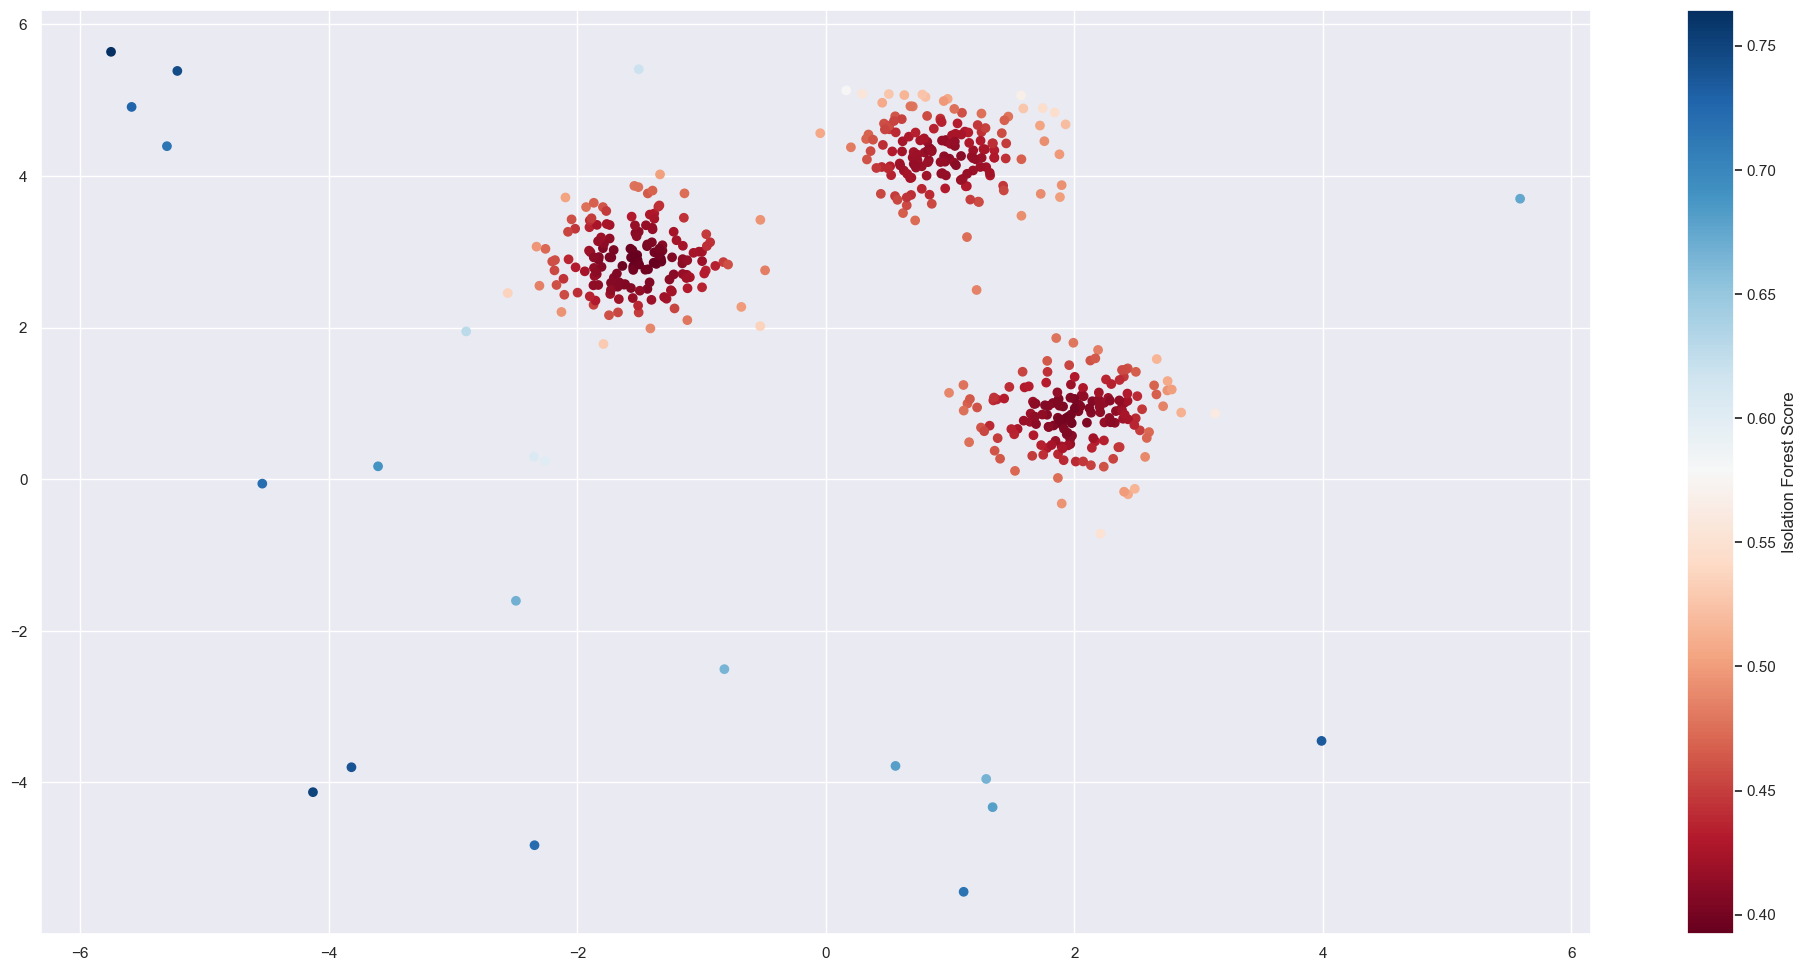

In [5]:
# dataset
x = df_raw.drop( 'class', axis=1 )

# model definition
iso_model = en.IsolationForest( n_estimators=100,
                                contamination=outliers_fractions, 
                                n_jobs=-1 )

# model trainnig
iso_model.fit( x )


# predict
pred = iso_model.predict( x )
pred_score = -1 * iso_model.score_samples( x )

# otliers detection
df_raw[ 'outlier' ] = pred_score

plt.scatter(df_raw['x1'], df_raw['x2'], c=df_raw[ 'outlier' ], cmap='RdBu')
plt.colorbar( label='Isolation Forest Score' )
plt.show
#sns.scatterplot( x='x1', y='x2', hue='outlier',  data=df_raw, palette='colorblind' );

# Removing Outliers

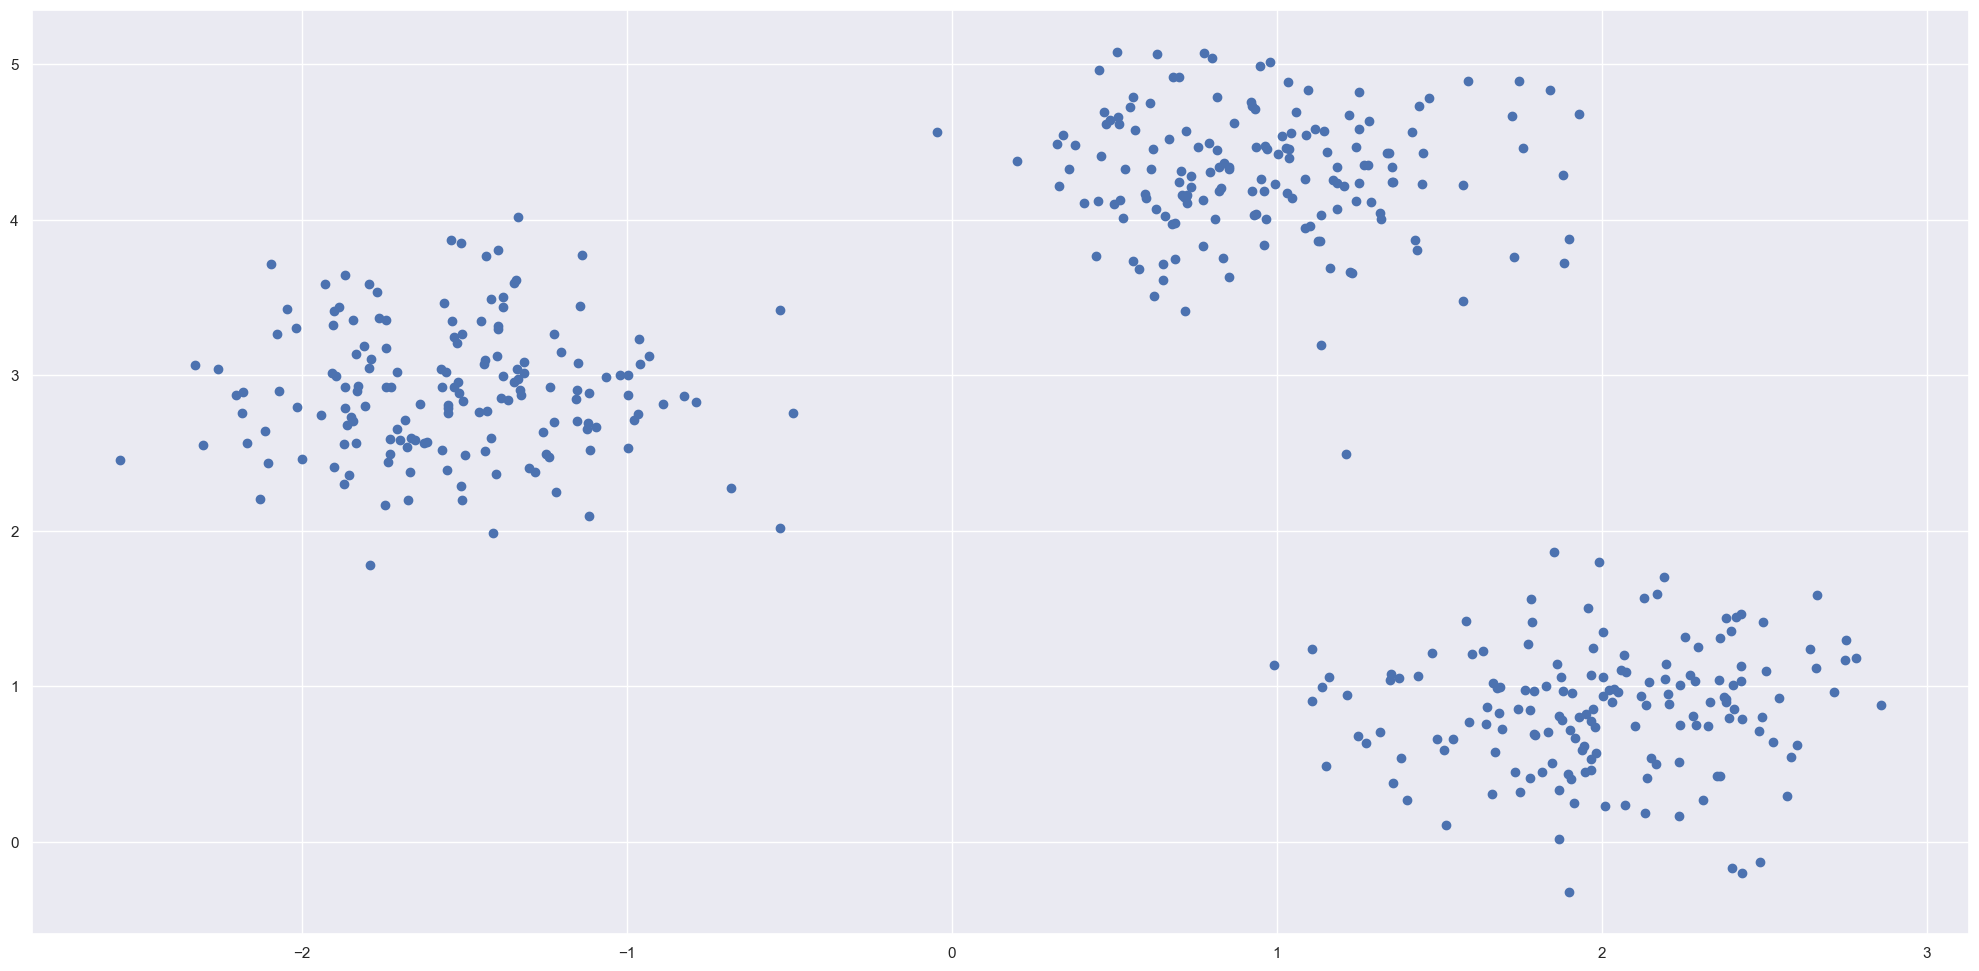

In [6]:
threshold = 0.55
df_raw['outlier_flag'] = df_raw['outlier'].apply( lambda x: 1 if x > threshold else 0 )
df_raw = df_raw.loc[ df_raw['outlier_flag'] == 0, :]
df_raw.head()

plt.scatter(df_raw['x1'], df_raw['x2'])


# Fine Tunning Clustering

In [7]:
##################### Funcao para decobrir melhor numero de k  ###############################

#################### Apos rodado o melhor k demostrado foi o de 3 ###########################

clusters = list( range( 2, 9 ) )


# dataset
x = df_raw.loc[:, ['x' + str(i) for i in list( range( 1, n_features + 1 ) ) ]]


silhouette_list = []

for k in clusters:
    # Model definition
    kmeans_model = c.KMeans( n_clusters=k , n_init=2 )


    # Model trainning
    kmeans_model.fit( x )

    # Prediction
    labels = kmeans_model.predict( x )
    df_raw['labels'] = labels
    
    sil = m.silhouette_score( x, labels )
    silhouette_list.append( sil )
    



(0.0, 1.0)

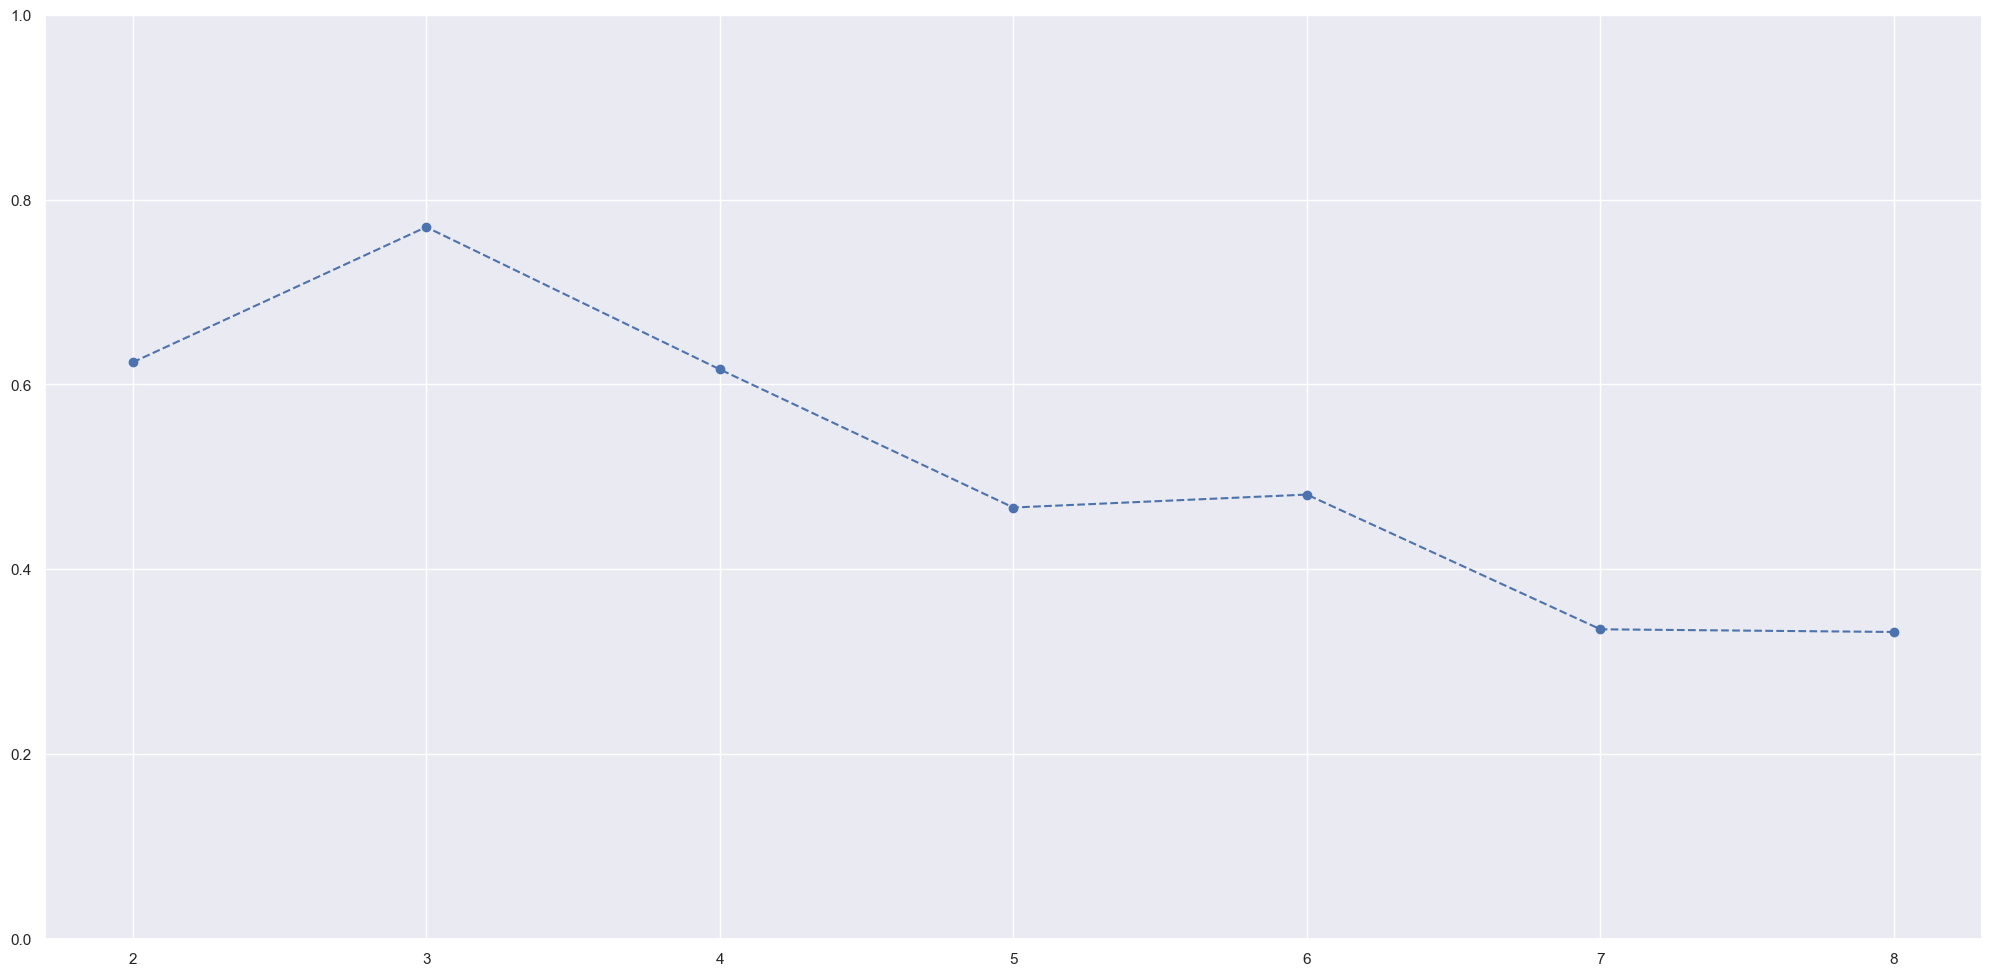

In [8]:
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.ylim( [0, 1] )

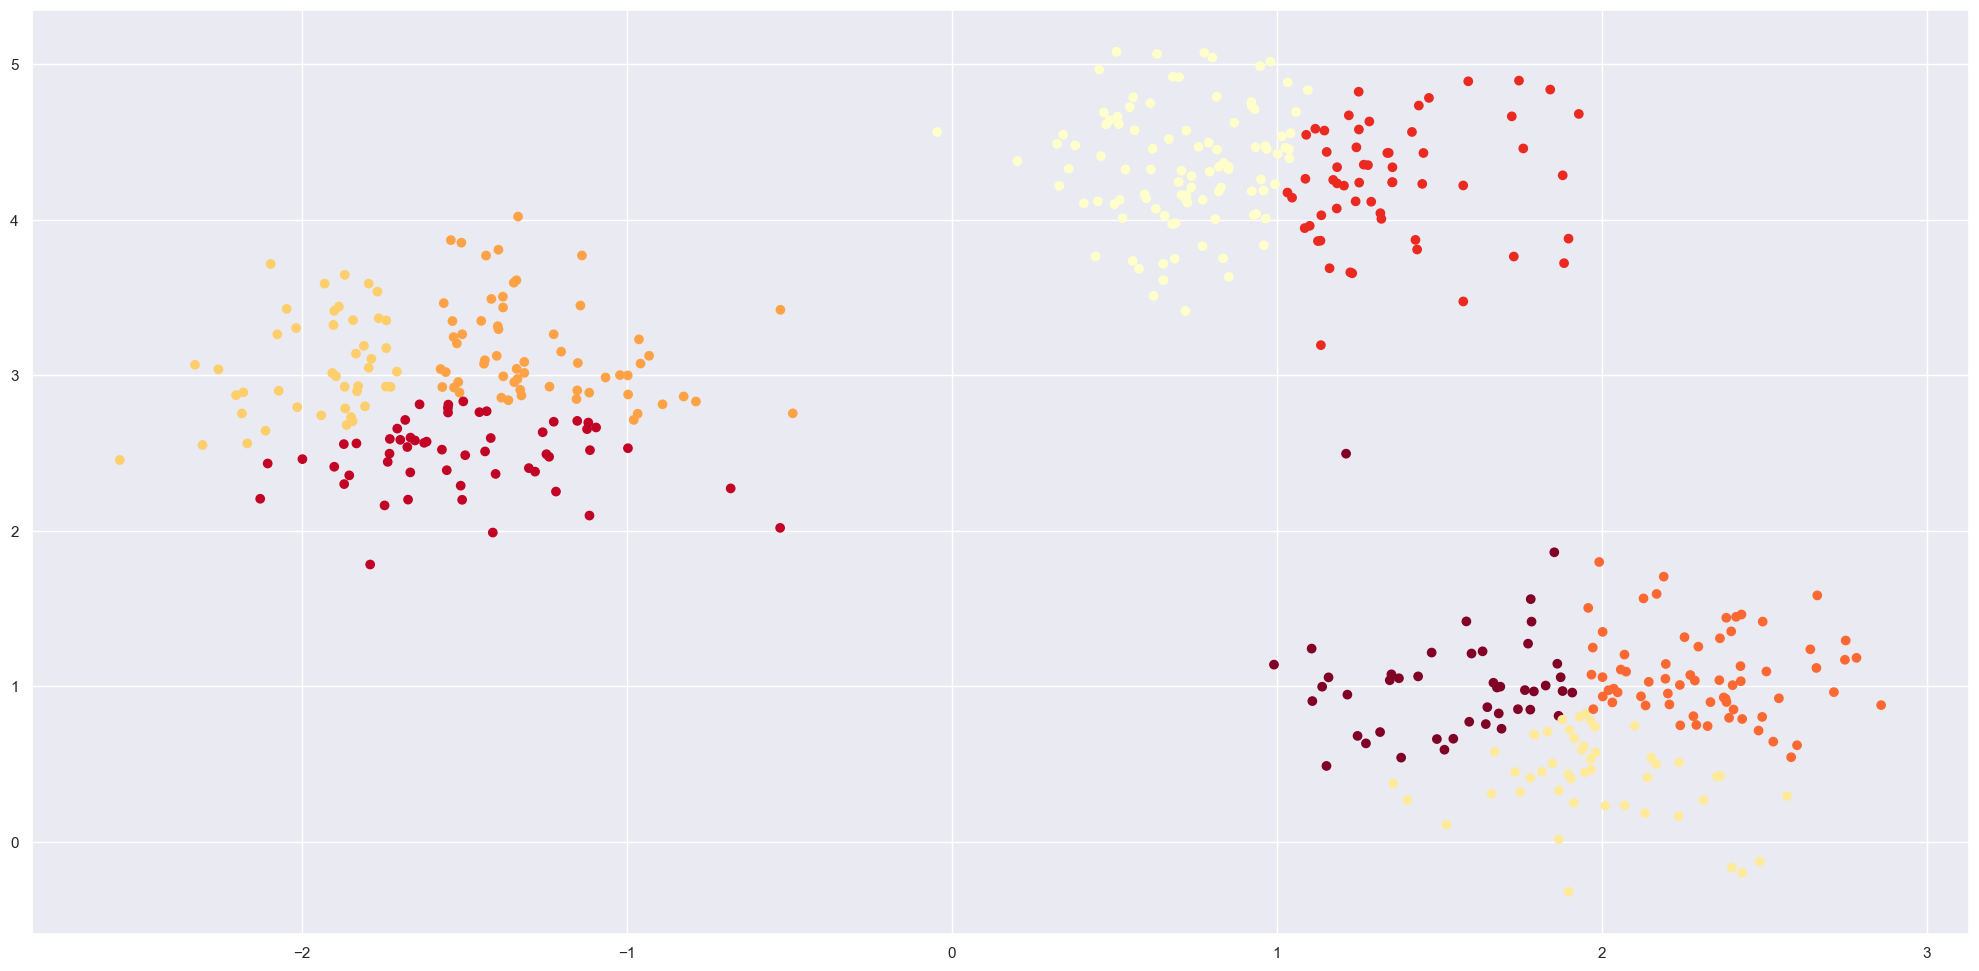

In [9]:
plt.scatter( df_raw['x1'], df_raw['x2'], c=df_raw['labels'], cmap='YlOrRd')
plt.show()

# Machine Learning Trainning

In [10]:
k = 3

# Model definition
kmeans_model = c.KMeans( n_clusters=k , n_init=2 )


# Model trainning
kmeans_model.fit( x )

# Prediction
labels = kmeans_model.predict( x )
df_raw['labels'] = labels

sil = m.silhouette_score( x, labels )
print( sil )

0.7699116408882508


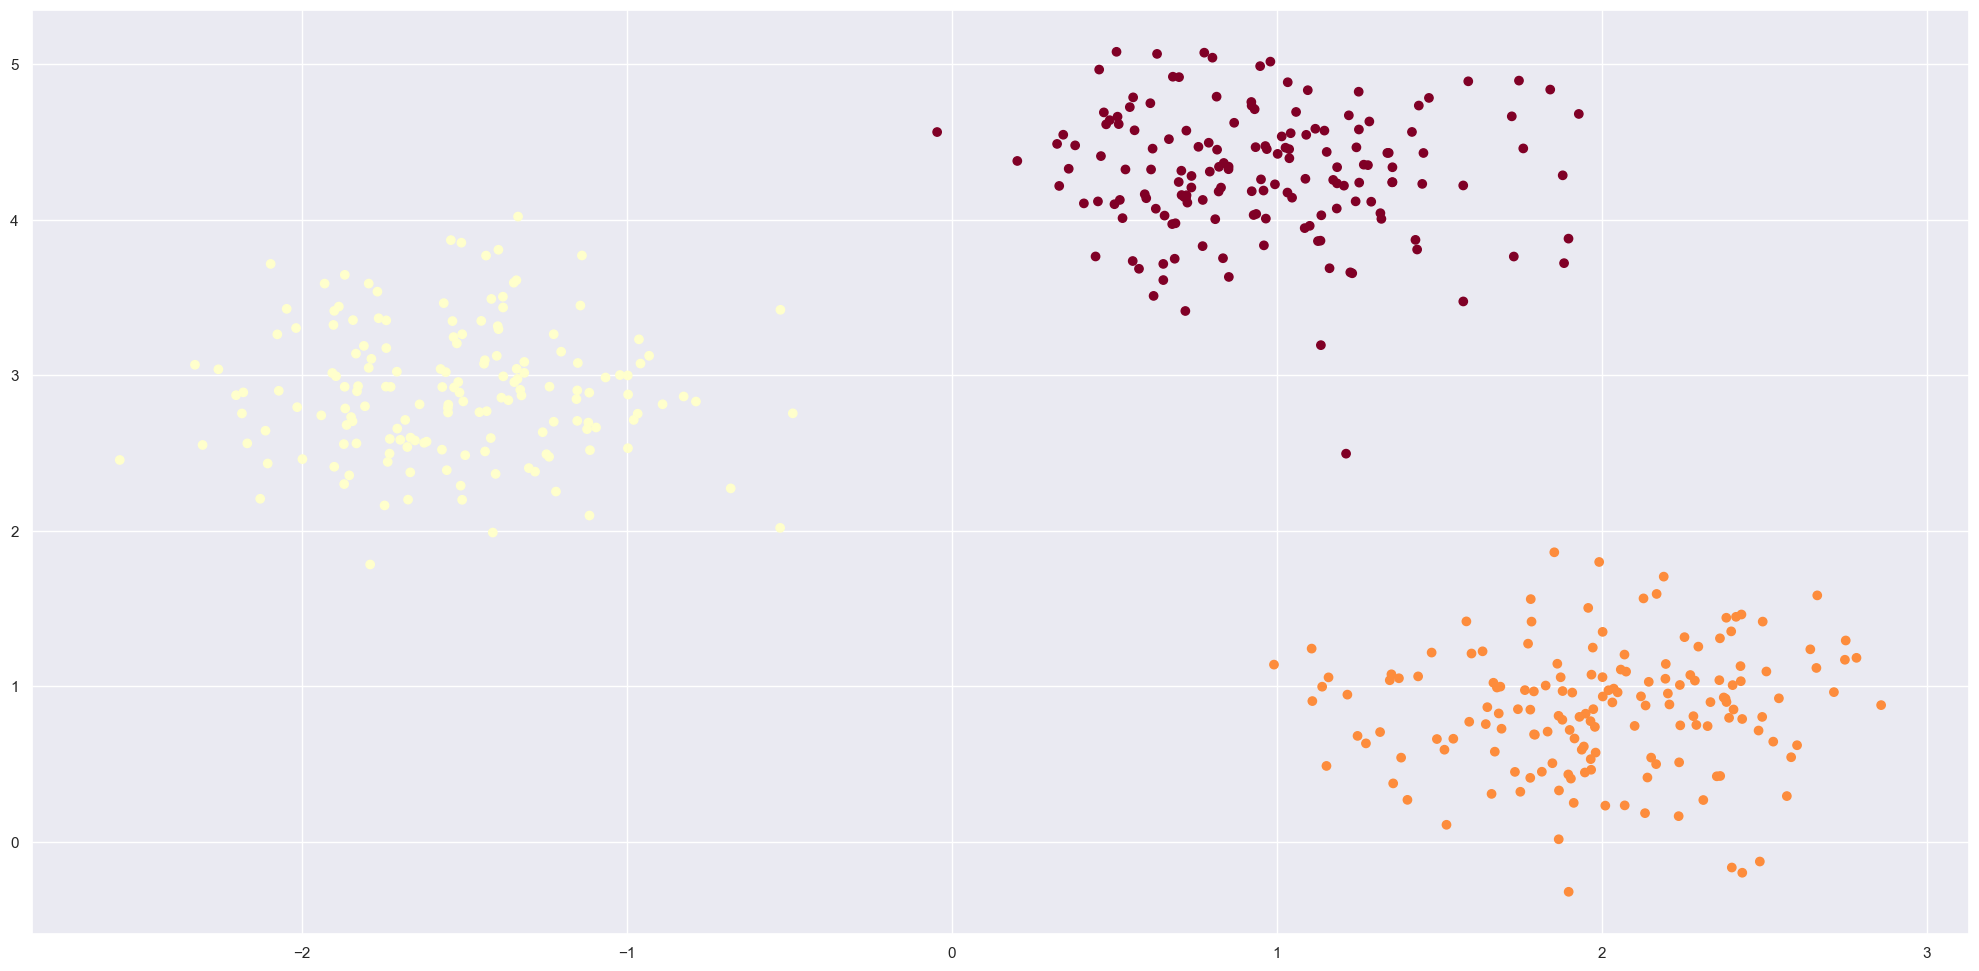

In [11]:
plt.scatter( df_raw['x1'], df_raw['x2'], c=df_raw['labels'], cmap='YlOrRd')
plt.show()

# 1.0 Data Discriptive

## 1.1 Load dataset

In [12]:
df1 = pd.read_csv( '/Users/adriele/Documents/repos/pa006/dataset/bank.csv')

## 1.2 Rename columns

In [13]:
df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [14]:
df1.columns = [ 'id', 'balance', 'balance_freq', 'purchases','one_purchases', 'install_purchases', 'cash_adv',
       'purchases_freq', 'one_purchases_freq', 'purchases_install_freq', 'cash_adv_freq',
       'cash_adv_trx', 'purchases_trx', 'credit_limit', 'payments','min_pay', 'prc_full_pay', 'tenure']



In [15]:
df1.head(20)

,id,balance,balance_freq,purchases,one_purchases,install_purchases,cash_adv,purchases_freq,one_purchases_freq,purchases_install_freq,cash_adv_freq,cash_adv_trx,purchases_trx,credit_limit,payments,min_pay,prc_full_pay,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## 1.3 Data Dimension

In [16]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 18
Number of Rows 8950


## 1.4 Check NA

In [17]:
df1.isna().sum()

id                          0
balance                     0
balance_freq                0
purchases                   0
one_purchases               0
install_purchases           0
cash_adv                    0
purchases_freq              0
one_purchases_freq          0
purchases_install_freq      0
cash_adv_freq               0
cash_adv_trx                0
purchases_trx               0
credit_limit                1
payments                    0
min_pay                   313
prc_full_pay                0
tenure                      0
dtype: int64

## 1.5 Replace NA

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isna().sum()

## 1.6 Data Types

In [ ]:
df1.dtypes

In [ ]:
df1['id'] = df1['id'].replace('C', '', regex=True).astype( int)

In [ ]:
df1.dtypes

# 1.7  Descriptive Startisc

Location Estimate:

    - Mean = Soma of all value divided for the quantity of value.
    - Median = middle value - midpoint value when the dataset is divided into 2 parts.
    - Minimum = The lower value on dataset.
    - Maximum = The big value on dataset.
    
    
Variable Estimate:

    - Deviation = Variable estimete that meansure the values dispersion from dataset around a location estimate (mean).  
    - Standard Deviation = Is the points averange distance around a locatio metric, tha's the mean. + the variance calculete  
    - Variance = Is the calculation of squared deviations by subtracting 1
    - Range
   

## Skewness

- Is the dimersion of a data distribution, copared a normal distribution, and can be: positieve or negative / to right or to left / low or high.
    
        - Close to  0 = Normal distribution;
        - Close to -1 = Negative distribution;
        - Close to +1 = Positive distribution;
        
        - Median > Mean = Tail shifted to the left = Negative skweness;
        10 - 15 = -5
        - Median < Mean = Tail shifted to the right = Positive skweness;
        10 - 8 = 2

## Kurtoses 

- Show the long tails ( the probability of extrame values appear, even its max or min) 

## Quantile

- Any of 3 values that separete a dataset, ordely in 4 equal parts, each part represent 1/4  from origina sample.



    - First Quantile  (bottom) = Is the part of dataset that delimit 25% from dataset;
    - Second Quantile (middle) = Is the part of dataset that delimit 50% from dataset;
    - Third Quantile  ( top )  = Is the part of dataset that delimit 75% from dataset;

## Percentile

- Are the meansures that divide a ordely sample in 100 equal parts.

    - Perc. 01 = 1% from dataset.
    - Perc. 10 = 10% from dataset.
    - Perc. 25 = 25% from dataset => First Quantile.
    - Perc. 50 = 50% from dataset => Second Quantile.
    - Perc. 75 = 75% from dataset => Third Quantile.

In [ ]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=[ 'int64', 'float64', 'datetime64[ns]'] )

## 1.7.1 Numerical Atributes

In [ ]:
# Central Tendency - mean, Median
ct1 = pd.DataFrame (num_attributes.apply (np.mean) ).T
ct2 = pd.DataFrame (num_attributes.apply (np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply (np.std) ).T
d2 = pd.DataFrame (num_attributes.apply (min)).T
d3 = pd.DataFrame (num_attributes.apply (max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max () -x.min ()) ).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () ) ).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis ()) ).T

# Concatane
med =pd.concat ([ d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
med.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


# Percetis
percentis =  num_attributes.apply( lambda x: np.percentile( x, q=[10, 25, 50, 75, 95,99] ) ).T.reset_index()
percentis.columns = ['attributes', 'P10', 'P25', 'P50', 'P75', 'P95', 'P99']

m2 = pd.merge( med, percentis, how='inner', on='attributes')
m2

- Min_pay = has a skew of 13.62 - Low customers are doing the minimum payment;
- Purchase = 0, mean that there are some custumer that never used the card.
- adv_cash_freq = most of custumers doesn't use the cash adv from card.
- Purchase_trx = show that the most of custumer has lower purchases on card.

In [ ]:
## Id = Codigo indentificador unico para cada cliente.

## Balance =  Quanto eu ja gastei no cartao de credito ( a fatura)
## Possiveis Outliers

## Segunda opcao p o Balance = Fatura atual - limite do catao. O quanto falta de limite disponivel p
## Possiveis Outliers.

## Balace Frequency = Frequencia de uso do cartao ( usabilidade )

## Purchases = Valor gasto no catao nos ultimos 6 meses( a soma de todos os valores quando a pessoa passou o cartao )

## Purchase One Off = Soma de todas as compras pagas em 1x no cartao nos ultimos 6 meses.

## Installment Purchases = Soma de todas compras pagas em mais de 1x no cartao de credito nos ultimos 6 meses.
## ( Categoria )

## Cash Advance = Valor do saque do limite do cartao de credito acumulado dos ultimos 6 meses.

## Purchase Frequency =  Um valor de 0 e 1 que indentifica a frequencia de compras do cliente.

## Cash Advance Frequency = A frequencia com o cliente faz retiradas de dinheiro do seu cartao de credito.

## Cash Advance TRX = Quantidade de saques da contas do cartao de credito.

## Purchase TRX =  A quantidade de compras realizadas no cartao de credito.

## Credit Limit = O valor limite do cartao de credito do cliente.

## Payments = O valor pago alem do minimo da fatura ( nao necessariamente a fatura total )
# Ex:
# Fatura total = 300
# pagamento minimi = 2000
# Pagamento efetivo = 2500

#Payment = 500
# Minimum Payment =  2000
# pagamento total = Payment + Minimum Payment = 2500

## Minimum Payments = Valor minimo pago da fatura.

## Tenure =  O tempo de posse do cartao em messes( tempo em que a pessoa e cliente do banco )


In [ ]:
plt.figure( figsize=( 20, 10) )
sns.histplot( x='credit_limit', data=num_attributes )

## Box Plot
- Show the 4 attributes principal of a feature: 
    - center
    - Variability
    - Asymmetry 
    - Outliers.


Attributes:
- Outliers
- Minimum
- Quartile 1
- Quartile 2
- Quartile 3
- Maximun
- Outliers

In [ ]:
plt.figure( figsize=( 20, 10) )
sns.boxplot( x='credit_limit', data=num_attributes )

In [ ]:
np.quantile( num_attributes['credit_limit'], q=[0.25, 0.50, 0.75] )

In [ ]:
q1 = 1600
q2 = 3000
q3 = 6500

In [ ]:
minq =  q1 - 1.5 * ( q3 - q1)
minq

In [ ]:
num_attributes['credit_limit'].min()

In [ ]:
maxq = q3 + 1.5 * ( q3 -q1)
maxq

In [ ]:
# #calculate real minimum and maximum

# minq =  q1 - 1.5 * ( q3 - q1)
# maxq = q3 + 1.5 * ( q3 -q1)

# if minq < min_value_from_dataset:
#     print( num_attributes[ 'credit_limit' ].min() )
    
# else:
#     print( minq)
    


    
# if maxq > max_value_from_dataset:
#     print( max_value_from_datase) 
    
# else:
#     print( maxq)    


## Violin Plot
- Show the 4 attributes principal of a feature: 
    - Center
    - Variability
    - Asymmetry 
    - Outliers
    - Density.

In [ ]:
plt.figure( figsize=( 20, 10) )
sns.violinplot( x='credit_limit', data=num_attributes )

# 2.0 Data Filtering

In [ ]:
df2 = df1.copy()

# 3.0 Feature Engeneering

In [ ]:
df3 = df2.copy()

In [ ]:
## Dimensao:

# Tempo ( Ano, mes , dia, hora e minuto )
# Espaco ( localizacao, regiao, lat, log, bairro, rua )
# Produto ( nome, tipo, categoria, preco, condicao de compra )
# Marketing ( organica, paid{ facebook, google})

In [ ]:
## Candidate Feature to be Removed ( i don't know the feature has been calculate )
# cash_adv_freq 
# purchases_install_freq 
# tenure

In [ ]:
df3.columns


# 3.1 Unit Price

In [ ]:
# uni price
#df3.loc[:,'unit_price'] = df3.loc[:, 'purchases'] / df3.loc[:, 'purchases_trx']


# # one off payment yes or not  ( pagamento a vista ou nao )
# df3['one_payment'] = df3['one_purchases'].apply( lambda x: 0 if x == 0.00 else 1)

# # Avg spent by each transaction ( gasto medio por transacao de compra )
# df3['avg_ticket_purchases'] = df3['purchases'] / df3['purchases_trx'] 

# # Total Avg spent by each transaction ( gasto medio total por transacao de compra )
# df3['avg_ticket_expenses'] = ( df3['purchases'] + df3['cash_adv'] ) / ( df3['purchases_trx'] + df3['cash_adv'])

# # Payment Sum ( soma das despesas /. pagamentos)
# df3['debit_rate'] = ( df3['purchases'] + df3['cash_adv'] ) / ( df3['payments'] + df3['min_pay'])


# # Percentage of card limite use ( )
# df3['credit_limit_rate'] = df3['purchases'] / 6 * df3['credit_limit']

In [ ]:
df3.head()

# 3.2 Gross Revenue

In [ ]:
#df3.loc[:,'gross_revenue'] = df3.loc[:, 'purchases_trx'] * df3.loc[:, 'unit_price']


In [ ]:
# df3 = df3.dropna()

# 4.0 Exploratory Data Analysis

In [ ]:
df4 = df3.copy()

## 4.1 Isolation Forest

In [ ]:
rng = np.random.RandomState( 42 )

In [ ]:
# Train
model = en.IsolationForest(n_estimators=50, 
                      max_samples=500, 
                      contamination=float(0.1),
                      random_state=rng,
                      n_jobs=-1)
# Prediction
preds = model.fit_predict(df4)

# Performance
df4['outliers'] = preds

In [ ]:
sns.scatterplot( x=1, y=0, hue='outliers', data=df4 )


## 4.1 Univariate Analysis


In [ ]:
profile = ProfileReport( df4 )
profile.to_file( 'output.html' )

In [ ]:
sns.distplot (df4['payments'])

In [ ]:
correlation = num_attributes.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

## 4.2 Bivariate Analysis


In [ ]:
cols = ['id']
df42 = df4.drop( cols, axis=1 )
df4 = df4.dropna()

In [ ]:
plt.figure( figsize=(25, 12) )
sns.pairplot( df42)

## 4.3 Outliers Detection


In [ ]:
a = df4.select_dtypes (include = ['int64', 'float64'])

sns.boxplot (df4[['balance', 'purchases', 'one_purchases','install_purchases', 'cash_adv', 'credit_limit', 'payments', 'min_pay' ]] )

## 4.4 Feature Selection

    - Normal Variable + no outliers = Standard Scaler ( x - mean / std )
    - Normal Variable + outliers    = Robust Scaler ( x - Q1 / ( Q3 - Q1) )
    _ Non Normal Variable           = Min Max Sacler ( x - min / ( max - min ) )


In [ ]:
df44 = df4.drop( columns=['id'] ) 

mm = pp.MinMaxScaler()

df44['tenure'] = mm.fit_transform( df44[['tenure']] )
df44['balance'] = mm.fit_transform( df44[['balance']] )
df44['min_pay'] = mm.fit_transform( df44[['min_pay']] )
df44['payments'] = mm.fit_transform( df44[['payments']] )
df44['cash_adv'] = mm.fit_transform( df44[['cash_adv']] )
df44['purchases'] = mm.fit_transform( df44[['purchases']] )
df44['cash_adv_trx'] = mm.fit_transform( df44[['cash_adv_trx']] )
df44['balance_freq'] = mm.fit_transform( df44[['balance_freq']] )
df44['credit_limit'] = mm.fit_transform( df44[['credit_limit']] )
df44['prc_full_pay'] = mm.fit_transform( df44[['prc_full_pay']] )
df44['cash_adv_freq'] = mm.fit_transform( df44[['cash_adv_freq']] )
df44['one_purchases'] = mm.fit_transform( df44[['one_purchases']] )
df44['purchases_trx'] = mm.fit_transform( df44[['purchases_trx']] )
df44['purchases_freq'] = mm.fit_transform( df44[['purchases_freq']] )
df44['install_purchases'] = mm.fit_transform( df44[['install_purchases']] )
df44['one_purchases_freq'] = mm.fit_transform( df44[['one_purchases_freq']] )
df44['purchases_install_freq'] = mm.fit_transform( df44[['purchases_install_freq']] )

x = df44.copy()

## 4.5 Study of Space


### 4.5.1 PCA

In [ ]:
pca = dd.PCA( n_components =  x.shape[1] )

principal_components = pca.fit_transform( x )

# Plot Explaneid Variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_)

# PCA Conponent
df_pca = pd.DataFrame( principal_components )

In [ ]:
sns.scatterplot( x=0, y=1, data=df_pca )

### 4.5.2 Umap

In [ ]:
# reducer = umap.UMAP( random_state=42 )
# embedding = reducer.fit_transform( x )

# # Embedding
# df_pca['embedding_x'] = embedding[:, 0]
# df_pca['embedding_y'] = embedding[:, 1]


# # Plot UMAP
# sns.scatterplot( x='embedding_x',
#                  y='embedding_y',
#                  data = df_pca )

### 4.5.3 T-SNE

In [ ]:
reducer = mn.TSNE( n_components=2, random_state=42, n_jobs =1)

embedding = reducer.fit_transform( x )

# Embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_pca )

### 4.5.4 Tree Based Imbedding

In [ ]:
x = df44.drop( columns=[ 'payments' ], axis=1)
y = df44['payments']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# Model training
rf_model.fit( x, y )


# dataframe Leaf
df_leaf= pd.DataFrame( rf_model.apply( x ) )

In [ ]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )


# Embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_tree )

In [ ]:
df44.head()

## 4.6 Embeding Definition

# 5.0 Data Preparation

In [ ]:
df5 = df4.copy()

# 6.0 Feature Selection

In [ ]:
df6 = df5.copy()

# 7.0 Fine Tunning Hyperparameter

In [ ]:
df7 = df6.copy()

x = df7.drop( columns=['id'] )


## 7.1 KMeans

In [ ]:
clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
davies_list = []

for k in clusters:
    # modeldefinition
    kmeans_model = c.KMeans( n_init=10, n_clusters=k )
    
    # model training
    kmeans_model.fit( x )
    
    # Model predict 
    labels =  kmeans_model.predict( x )
    
    # model performance
    sil = m.silhouette_score( x, labels )
    dav = m.davies_bouldin_score( x, labels )
    
    
    silhouette_list.append( sil)
    davies_list.append( dav )


In [ ]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'SS - Silhouette Score' )
plt.title('Silhouette Score');

In [ ]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'DB - Davies Score' )
plt.title('Davies Score');

## 7.2 GMM

In [ ]:
gmm_list = []
for k in clusters:
    # Model definition
    gmm_model = mx.GaussianMixture( n_components=k )

    # Model training
    gmm_model.fit( x )

    # Model  predict
    labels = gmm_model.predict( x )

    # Model performance
    sil = m.silhouette_score( x, labels, metric='euclidean')
    gmm_list.append( sil )
    
    
    
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b')  
plt.xlabel( 'k');
plt.ylabel( 'Silhouette Score' );
plt.title( 'Sil x K');

## 7.3 DBScan

In [ ]:
#eps =0.1
eps =2.0
min_samples = 20


# Model definition
dbscan_model =c.DBSCAN( eps=eps, min_samples=min_samples )

# Model training
labels = dbscan_model.fit_predict( x )


# Model performance
sil = m.silhouette_score( x, labels, metric='euclidean')




neigbors = NearestNeighbors( n_neighbors=min_samples ).fit( x )
distances, indices = neigbors.kneighbors( x )

distances = np.sort( distances, axis=0 )
distances = distances[:, 1]
plt.plot( distances )

# 8.0 Machine Learning

# 9.0 Clustering Analysis

# 10.0 EDA - Insight Reports

# 11.0 Deploy to Production